## Hipótesis

En este notebook se van a cruzar las columnas Time y Fatal (Y/N) para probar la hipótesis de que los ataques de tiburón que se producen durante la noche tienen un mayor índice de letalidad.

In [1]:
# librerias y configuración

import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/attacks_clean.csv', encoding= "ISO-8859-1")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6299 entries, 0 to 6298
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case Number             6299 non-null   int64 
 1   Date                    6299 non-null   object
 2   Year                    6297 non-null   object
 3   Type                    6299 non-null   object
 4   Country                 6299 non-null   object
 5   Area                    6299 non-null   object
 6   Location                6299 non-null   object
 7   Activity                6299 non-null   object
 8   Name                    6299 non-null   object
 9   Sex                     6299 non-null   object
 10  Age                     6299 non-null   object
 11  Injury                  6299 non-null   object
 12  Fatal (Y/N)             6299 non-null   object
 13  Time                    6299 non-null   object
 14  Species                 6299 non-null   object
 15  Inve

In [4]:
# Se borran el resto de las columnas excepto Fatal (Y/N)

df.drop(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex', 'Age',
         'Injury', 'Species', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1',
         'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23'], axis=1, inplace=True)

# Se borran todas las filas con unknowns

df = df[~((df['Time'] == 'unknown' ) | (df['Fatal (Y/N)'] == 'unknown'))]

# Se cambian los tipos de datos para la columna  Date, guardandose solo las horas

df['Time'] = df['Time'].replace(':\d+', '', regex=True)

df['Time'] = df['Time'].astype('int')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2262 entries, 0 to 6198
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Fatal (Y/N)  2262 non-null   object
 1   Time         2262 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 53.0+ KB


Time  Fatal (Y/N)
21    Y              60.000000
2     Y              60.000000
4     Y              50.000000
1     Y              40.000000
3     Y              40.000000
5     Y              27.272727
9     Y              21.186441
15    Y              20.940171
22    Y              20.000000
6     Y              18.918919
10    Y              18.128655
16    Y              17.543860
14    Y              16.956522
12    Y              16.410256
17    Y              15.706806
13    Y              14.795918
11    Y              14.522822
20    Y              13.793103
8     Y              13.333333
18    Y              12.800000
23    Y              12.500000
19    Y              11.111111
7     Y              10.126582
dtype: float64

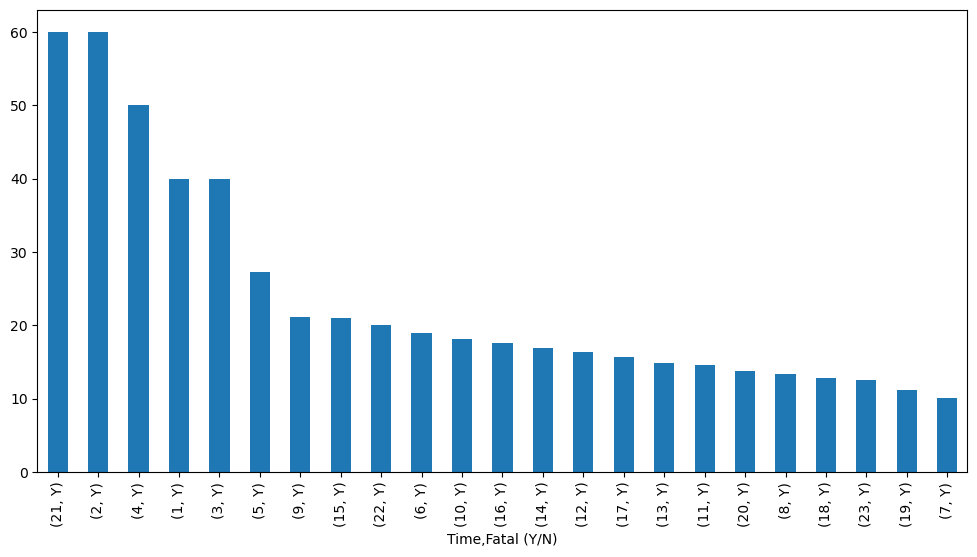

In [6]:
# Se quiere saber el porcentaje letalidad de los ataques según la hora en que se producen

# Se crea una serie llamada porcentajes, la cuál cruza los valores de Time con los de Fatal (Y/N)
    
porcentajes = df.groupby(df['Time']).value_counts() / df.groupby(df['Time']).size() * 100

# Se eliman los porcentajes de no letal, pues solo nos interesan los porcentajes de letalidad

porcentajes.drop(labels='N', level=1, inplace=True)

# Se representan los porcentajes de letalidad en un histograma

plt.figure(figsize=(12, 6))

porcentajes.sort_values(ascending = False).plot.bar();

porcentajes.sort_values(ascending = False) # Se obtienen los porcentajes de letalidad ordenados

Porcentaje nocturno: Fatal (Y/N)
Y    33.586456
dtype: float64
Porcentaje diurno:Fatal (Y/N)
Y    18.490372
dtype: float64


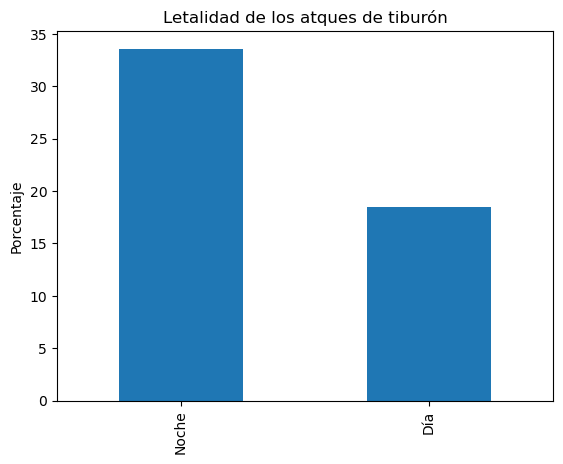

In [7]:
'''Para probar nuestra hipótesis, vamos a considerar horario nocturno entre las diez de la noche y las seis de
la mañana'''

porcentaje_nocturno = (porcentajes[22] + porcentajes[23] + porcentajes[1] + porcentajes[2] + porcentajes[3] + porcentajes[4] + porcentajes [5] + porcentajes[6]) / 8

porcentaje_diurno = (porcentajes[7] + porcentajes[8] + porcentajes[9] + porcentajes[10] + porcentajes[11] + porcentajes[12] + porcentajes [13] + porcentajes[14] + porcentajes[15] + porcentajes[16] + porcentajes[17] + porcentajes[18] + porcentajes[19] + porcentajes[20] + porcentajes [21]) / 15

print(f'Porcentaje nocturno: {porcentaje_nocturno}\nPorcentaje diurno:{porcentaje_diurno}')

# Ahora se convierten estos porcentajes en un data frame para su posterior representación en un gráfico

valores = pd.DataFrame({'nombres': ['Noche', 'Día'],'letalidad': [float(porcentaje_nocturno), float(porcentaje_diurno)]})

valores.set_index('nombres', inplace=True)

# Se genera el gráfico

valores.plot.bar(legend=False, xlabel='', title='Letalidad de los atques de tiburón', ylabel='Porcentaje')
plt.show()

## Resultado

Este análisis exploratorio demuestra que, en horario nocturno, la letalidad de los tiburones es del 33.59%, mientras que por el día este porcentaje baja hasta el 18.49%. Es por ello que, finalmente, la hipótesis de la mayor letalidad nocturna de los tiburones queda confirmada.